# Cross Validation

In [1]:
import pandas as pd
import pydataset
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
tips = pydataset.data('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
X = tips[['tip', 'total_bill', 'size']]
y = tips.time

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=.2)

In [4]:
dtree = DecisionTreeClassifier(max_depth=4)

cross_val_score(dtree, X_train, y_train, cv=4).mean()

0.7024872448979592

In [5]:
from sklearn.metrics import make_scorer, precision_score

Using precision "traditionally"

In [6]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [7]:
predicted = dtree.predict(X_train)
actual = y_train

precision_score(actual, predicted, pos_label='Dinner')

0.8571428571428571

Using precision as a metric for cross validation:

In [8]:
precision_scorer = make_scorer(precision_score, pos_label='Dinner')

# decision tree w/ max_depth = 4
cross_val_score(dtree, X_train, y_train, cv=4, scoring=precision_scorer).mean()

0.7357104700854701

In [9]:
cross_val_score(DecisionTreeClassifier(max_depth=3), X_train, y_train, scoring=precision_scorer).mean()

0.7396049896049897

## Grid Search

In [10]:
from sklearn.model_selection import GridSearchCV

# keys are names of hyperparams, values are a list of values to try for that hyper parameter
params = {
    'max_depth': range(1, 11),
    'criterion': ['gini', 'entropy']
}

# cv=4 means 4-fold cross-validation, i.e. k = 4
grid = GridSearchCV(dtree, params, cv=4)
grid.fit(X_train, y_train)

grid.best_params_

{'criterion': 'entropy', 'max_depth': 3}

In [11]:
# .best_estimator_ gives us a model that is prefit with the best hyperparams
model = grid.best_estimator_
model.score(X_test, y_test)

0.6530612244897959

In [12]:
grid.best_score_

0.7438350340136054

In [13]:
results = grid.cv_results_
results

{'mean_fit_time': array([0.00270927, 0.00179106, 0.0016169 , 0.00196493, 0.0019933 ,
        0.00192684, 0.00181848, 0.00171614, 0.00179541, 0.00169498,
        0.00162941, 0.0017367 , 0.00174028, 0.00172395, 0.00166768,
        0.00173396, 0.00163019, 0.00183046, 0.00178987, 0.00171179]),
 'std_fit_time': array([2.41135937e-04, 1.86908030e-04, 7.12373759e-05, 4.28557960e-04,
        2.43998586e-04, 2.59940626e-04, 1.27046835e-04, 8.75806239e-05,
        2.42604260e-04, 4.82838461e-05, 1.99696901e-04, 2.53573116e-04,
        1.38876661e-04, 1.99097171e-04, 6.22727638e-05, 1.49388445e-04,
        1.45772052e-05, 1.69822033e-04, 9.42609155e-05, 2.98344320e-05]),
 'mean_score_time': array([0.00133604, 0.00088257, 0.00083631, 0.00105304, 0.00096422,
        0.00090998, 0.0008238 , 0.0008148 , 0.00082117, 0.0008232 ,
        0.00080836, 0.00087643, 0.00079423, 0.00082135, 0.00082445,
        0.00089002, 0.00080854, 0.00081575, 0.00091195, 0.0007906 ]),
 'std_score_time': array([2.71729587e-

In [14]:
import matplotlib.pyplot as plt
plt.ion()
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-darkgrid')

In [15]:
results = grid.cv_results_
# Modify each parameter dictionary such that it also contains the model's average performance after cross validation
for score, p in zip(results['mean_test_score'], results['params']):
    # adding a new key to the dictionary
    p['score'] = score

# a list of dictionaries where each dictionary has the same keys can be turned into a dataframe
results['params']

pd.DataFrame(results['params'])

,criterion,max_depth,score
0,gini,1,0.733418
1,gini,2,0.733418
2,gini,3,0.718112
3,gini,4,0.697385
4,gini,5,0.625744
5,gini,6,0.666454
6,gini,7,0.656250
7,gini,8,0.666560
8,gini,9,0.640838
9,gini,10,0.671662


/usr/local/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/anaconda3/lib/python3.7/site-package

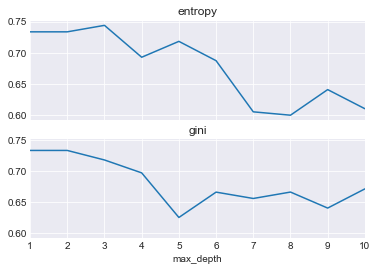

In [16]:
fig, axs = plt.subplots(2, 1, sharex=True, sharey=True)
for ax, (crit, subset) in zip(axs, pd.DataFrame(results['params']).groupby('criterion')):
    subset.set_index('max_depth').score.plot(ax=ax)
    ax.set(title=crit)

## Everything All Together

In [17]:
from sklearn.model_selection import GridSearchCV

# keys are names of hyperparams, values are a list of values to try for that hyper parameter
params = {
    'max_depth': range(1, 11),
    'criterion': ['gini', 'entropy']
}

# cv=4 means 4-fold cross-validation, i.e. k = 4
grid = GridSearchCV(dtree, params, cv=15)
grid.fit(X_train, y_train)

results = grid.cv_results_

for score, p in zip(results['mean_test_score'], results['params']):
    p['score'] = score
pd.DataFrame(results['params'])

,criterion,max_depth,score
0,gini,1,0.733333
1,gini,2,0.723077
2,gini,3,0.712821
3,gini,4,0.702564
4,gini,5,0.712821
5,gini,6,0.666667
6,gini,7,0.676923
7,gini,8,0.661538
8,gini,9,0.676923
9,gini,10,0.682051
